<a href="https://colab.research.google.com/github/LBQTrung/R-project/blob/main/GDP_VN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Đọc file dữ liệu:

In [61]:
GDP = read.table(file = "GDP_VN.txt", header = TRUE,sep = "\t")

####Hiển thị một vài thông số:

* Hiển thị số dòng, số cột của tập dữ liệu

In [11]:
dim(GDP)

[1] 15  7

* Hiển thị tên các cột (biến) của tập dữ liệu

In [4]:
names(GDP)

[1] "Year"                 "GDP"                  "GDP.per.capita.local"
[4] "GDP.per.capita.USD"   "GCF"                  "FC"                  
[7] "NEGS"

* Hiển thị tên các cột (biến) và thông tin đi kèm:

In [5]:
str(GDP)

'data.frame':	15 obs. of  7 variables:
 $ Year                : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ GDP                 : num  441646 481295 535762 1809149 2157828 ...
 $ GDP.per.capita.local: num  5689 6117 6720 19278 24818 ...
 $ GDP.per.capita.USD  : num  402 NA 440 1064 1273 ...
 $ GCF                 : num  130771 150033 177983 632326 770211 ...
 $ FC                  : num  321853 342607 382137 1206819 1565602 ...
 $ NEGS                : num  243049 262846 304262 1132688 1553687 ...


* Nhận thấy số dòng, số cột không nhiều nên ta có thể hiển thị hết tập dữ liệu:

In [12]:
GDP

Year,GDP,GDP.per.capita.local,GDP.per.capita.USD,GCF,FC,NEGS
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000,441646,5689.00,402.00,130771,321853,243049
2001,481295,6117.00,NA,150033,342607,262846
2002,535762,6720.00,440.00,177983,382137,304262
2003,1809149,19278.00,1064.00,632326,1206819,1132688
2004,2157828,24818.00,1273.00,770211,1565602,1553687
2005,2779880,31640.00,1517.00,827032,2008700,2206971
2006,3245419,36544.00,1748.00,884160,2285623,2597264
2007,3584262,39932.00,1907.00,956124,2566803,2997380
2008,3937856,43402.00,2052.00,1056632,2838048,3402495


#### Xử lí tập dữ liệu:

* Vấn đề: Sau khi quan sát tập dữ liệu, ta nhận thấy bị thiếu một giá trị ở biến **GDP.per.capita.USD**. Trong trường hợp dữ liệu có nhiều quan sát ta có thể dùng hàm sau để biết được số giá trị bị thiếu:

In [16]:
# Xây dựng hàm đếm NA:
NAPerVariable <- function(X1) { 
  D1 <- is.na(X1) 
  colSums(D1) 
}

In [15]:
NAPerVariable(GDP)

Year                  GDP GDP.per.capita.local 
                   0                    0                    0 
  GDP.per.capita.USD                  GCF                   FC 
                   1                    0                    0 
                NEGS 
                   0

* Cách xử lí: Có nhiều cách để xử lí giá trị bị mất (xóa, thay thế bằng trung bình,...). Trong trường hợp tập dữ liệu, biến **GDP.per.capita.USD** là dữ liệu thay đổi theo thời gian và có xu hướng tăng nên ta sẽ dùng hồi quy tuyến tính để thay thế vào giá trị bị thiếu như sau:

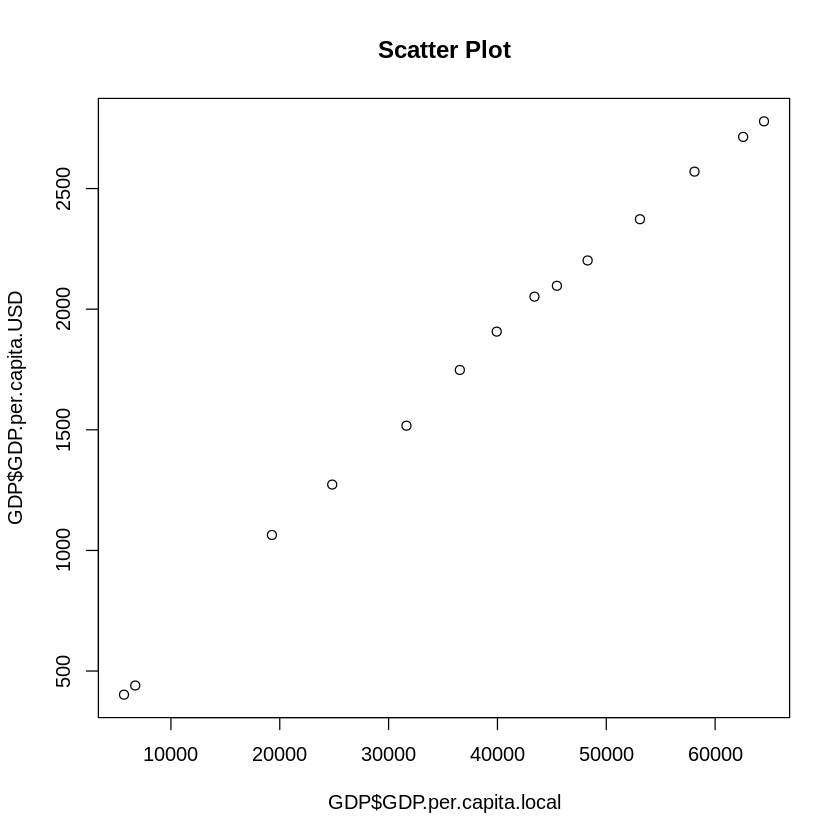

In [52]:
# Trực quan hóa bằng scatter plot
plot(GDP$GDP.per.capita.local,GDP$GDP.per.capita.USD,
    #  xlab = "GDP",
    #  ylab = "GDP per capita USD",
     main = "Scatter Plot")

In [54]:
lm.fit <- lm(GDP.per.capita.USD ~ GDP.per.capita.local, data=GDP)

In [55]:
coef(lm.fit)

(Intercept) GDP.per.capita.local 
        235.22940760           0.04045127

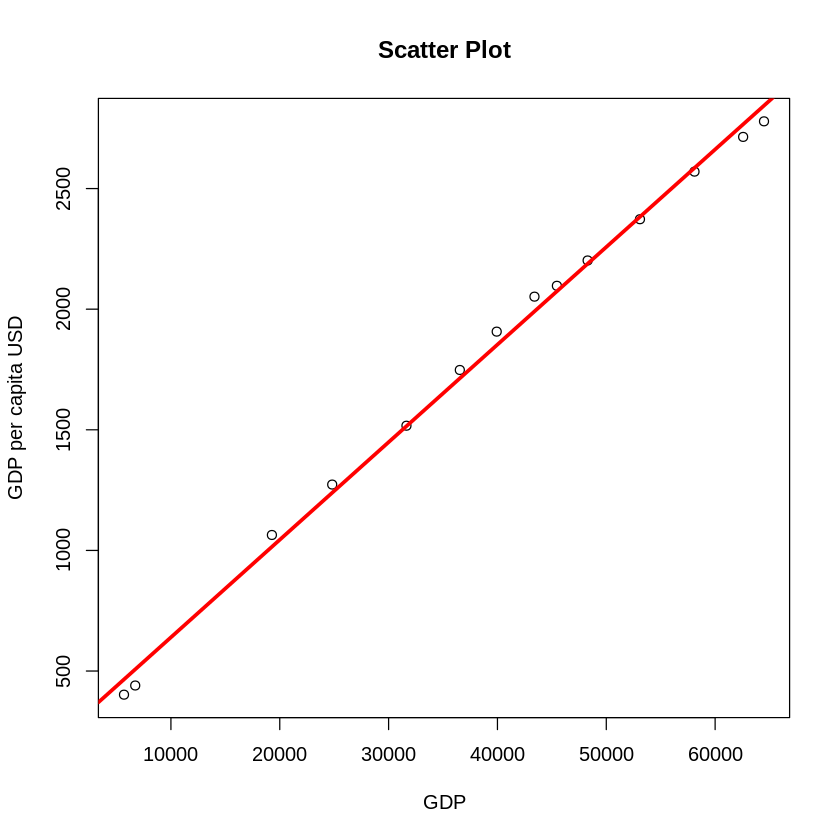

In [56]:
# Tạo đường tuyến tính:
plot(GDP$GDP.per.capita.local,GDP$GDP.per.capita.USD,
     xlab = "GDP",
     ylab = "GDP per capita USD",
     main = "Scatter Plot")
abline(lm.fit,lwd=3,col="red")

In [57]:
# Ta đã có được phương trình hồi quy:
# Tiến hành thay số ta được kết quả bị thiếu là:
235.229407595193 + 0.0404512653501748 * 6117.00

[1] 482.6698

* Thêm giá trị bị thiếu vào bảng:

In [63]:
GDP$GDP.per.capita.USD[2] = 482.67

In [64]:
# Kiểm tra dữ liệu:
GDP

Year,GDP,GDP.per.capita.local,GDP.per.capita.USD,GCF,FC,NEGS
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000,441646,5689.00,402.00,130771,321853,243049
2001,481295,6117.00,482.67,150033,342607,262846
2002,535762,6720.00,440.00,177983,382137,304262
2003,1809149,19278.00,1064.00,632326,1206819,1132688
2004,2157828,24818.00,1273.00,770211,1565602,1553687
2005,2779880,31640.00,1517.00,827032,2008700,2206971
2006,3245419,36544.00,1748.00,884160,2285623,2597264
2007,3584262,39932.00,1907.00,956124,2566803,2997380
2008,3937856,43402.00,2052.00,1056632,2838048,3402495


#### Vẽ các biểu đồ

* Biểu đồ GDP thay đổi theo thời gian hay biến year

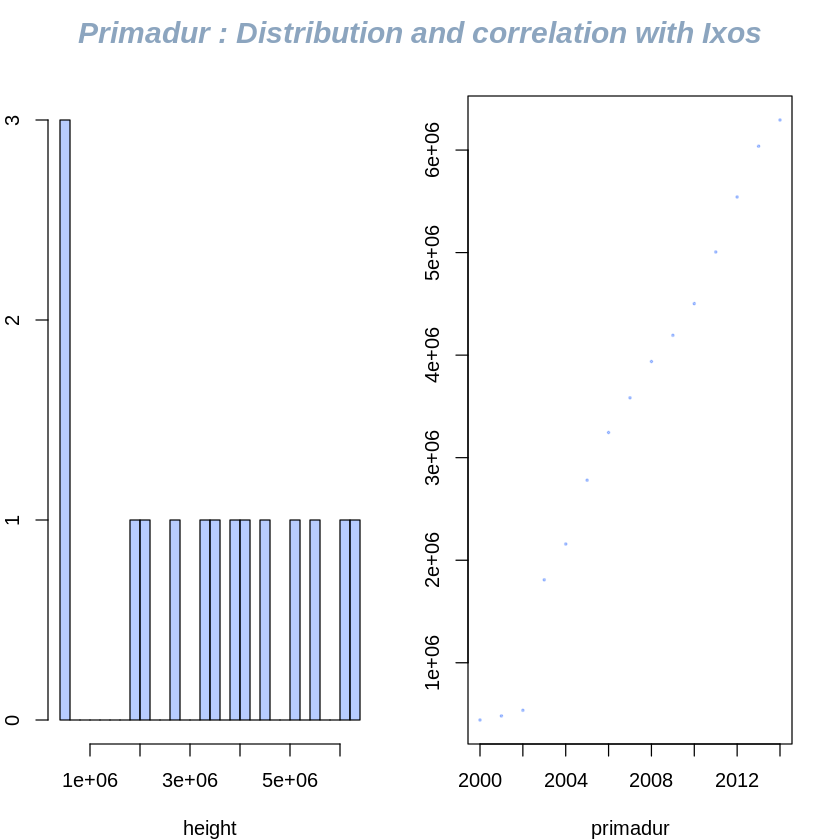

In [70]:
par(
  mfrow=c(1,2), 
  oma = c(0, 0, 2, 0)
) 
 
#Make the margin around each graph a bit smaller
par(mar=c(4,2,2,2))
 
# Histogram and Scatterplot
hist(GDP$GDP,  main="" , breaks=30 , col=rgb(0.3,0.5,1,0.4) , xlab="height" , ylab="nbr of plants")
plot(GDP$Year, GDP$GDP, main="" , pch=20 , cex=0.4 , col=rgb(0.3,0.5,1,0.4)  , xlab="primadur" , ylab="Ixos" )
 
#And I add only ONE title :
mtext("Primadur : Distribution and correlation with Ixos", outer = TRUE, cex = 1.5, font=4, col=rgb(0.1,0.3,0.5,0.5) )